<a href="https://colab.research.google.com/github/Divyanshu-ISM/Oil-and-Gas-data-analysis/blob/master/02_Linear_Regression_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
# Linear Regression Project

Congratulations! You just got some contract work with an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired you on contract to help them figure it out! Let's get started!

Just follow the steps below to analyze the customer data (it's fake, don't worry I didn't give you real credit card numbers or emails).

## Imports
** Import pandas, numpy, matplotlib,and seaborn. Then set %matplotlib inline 
(You'll import sklearn as you need it.)**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Get the Data

We'll work with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 

** Read in the Ecommerce Customers csv file as a DataFrame called customers.**

In [3]:
df = pd.read_csv('/workspaces/Oil-and-Gas-data-analysis/Datos/Datos_0425.csv')
df.head(2)

,Core_Kmax,GR,PEF,PHIA,PHIE,PHIN,RHOB,RoMS,RT,SwIrr,SwMS,VCL,VSH
0,0.059,60.4458,2.1984,0.1230,0.0756,0.2786,2.5160,14.7961,40.5701,0.6308,0.6308,0.5342,0.6170
1,0.002,87.6732,2.2292,0.1265,0.0588,0.3034,2.5438,12.0327,47.4945,0.8613,0.8613,0.9234,0.7878


**Check the head of customers, and check out its info() and describe() methods.**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Core_Kmax  177 non-null    float64
 1   GR         177 non-null    float64
 2   PEF        177 non-null    float64
 3   PHIA       177 non-null    float64
 4   PHIE       177 non-null    float64
 5   PHIN       177 non-null    float64
 6   RHOB       177 non-null    float64
 7   RoMS       177 non-null    float64
 8   RT         177 non-null    float64
 9   SwIrr      177 non-null    float64
 10  SwMS       177 non-null    float64
 11  VCL        177 non-null    float64
 12  VSH        177 non-null    float64
dtypes: float64(13)
memory usage: 18.1 KB


In [5]:
df.describe()

,Core_Kmax,GR,PEF,PHIA,PHIE,PHIN,RHOB,RoMS,RT,SwIrr,SwMS,VCL,VSH
count,177.000000,177.000000,177.00000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,1548.846900,44.579316,2.03201,0.204669,0.175554,0.238721,2.355353,14.658210,442.382658,0.232730,0.346363,0.291521,0.215438
std,2445.218486,22.253540,0.19987,0.037057,0.057366,0.043417,0.099974,2.494707,761.367625,0.209231,0.231373,0.276491,0.246003
min,0.000000,13.956400,1.52340,0.123000,0.036400,0.155200,2.175700,0.724100,23.932100,0.053600,0.076600,0.000000,0.000000
25%,3.110000,27.262300,1.92740,0.177900,0.131000,0.211300,2.283700,13.225800,47.724600,0.100100,0.158000,0.066000,0.007800
50%,424.000000,38.781600,2.00770,0.209700,0.195800,0.231100,2.328800,14.402000,172.899000,0.136400,0.261300,0.209000,0.124600
75%,2073.700000,54.905900,2.11040,0.234400,0.221600,0.264700,2.430000,16.106100,460.861800,0.290000,0.528200,0.438900,0.347300
max,12048.406300,114.679900,3.53180,0.277000,0.266700,0.362800,2.605100,20.411800,4667.658700,1.000000,1.000000,1.000000,1.000000


## Exploratory Data Analysis

**Let's explore the data!**

For the rest of the exercise we'll only be using the numerical data of the csv file.
___
**Use seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns. Does the correlation make sense?**

In [6]:
df.columns

Index(['Core_Kmax', 'GR', 'PEF', 'PHIA', 'PHIE', 'PHIN', 'RHOB', 'RoMS', 'RT',
       'SwIrr', 'SwMS', 'VCL', 'VSH'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


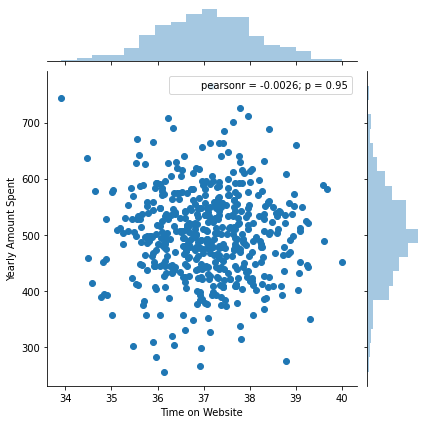

In [12]:
from scipy import stats
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=df).annotate(stats.pearsonr)
# No, the correlation does not make any sense.

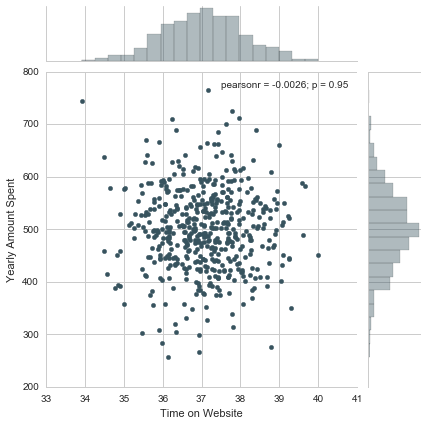

** Do the same but with the Time on App column instead. **

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


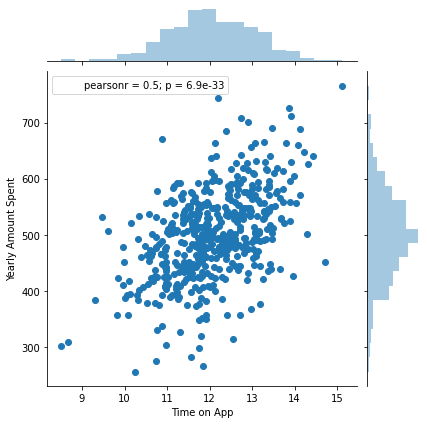

In [14]:
df.columns
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=df).annotate(stats.pearsonr)

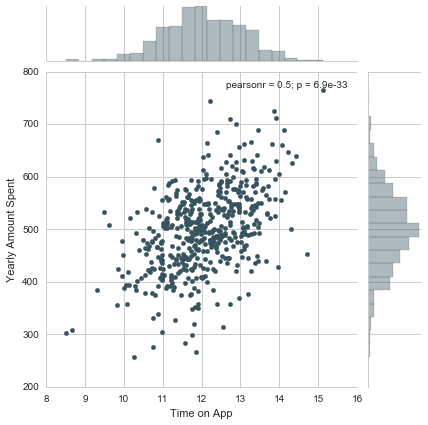

** Use jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.**

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


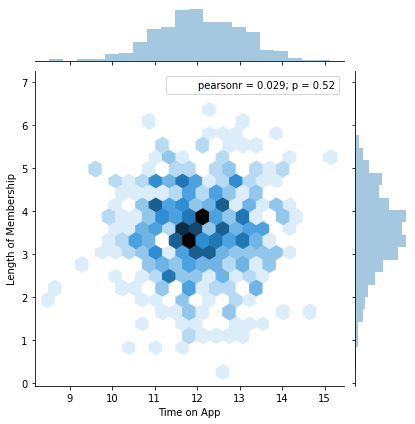

In [17]:
df.columns
sns.jointplot(x='Time on App',y='Length of Membership',data = df, kind='hex').annotate(stats.pearsonr)

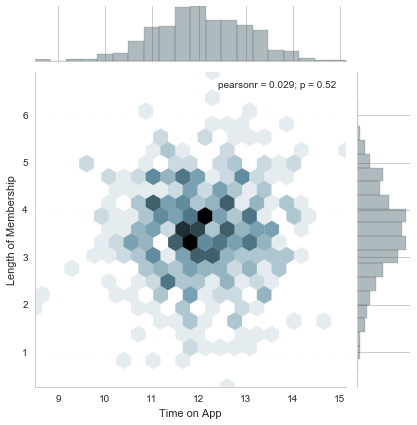

**Let's explore these types of relationships across the entire data set. Use [pairplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot) to recreate the plot below.(Don't worry about the the colors)**

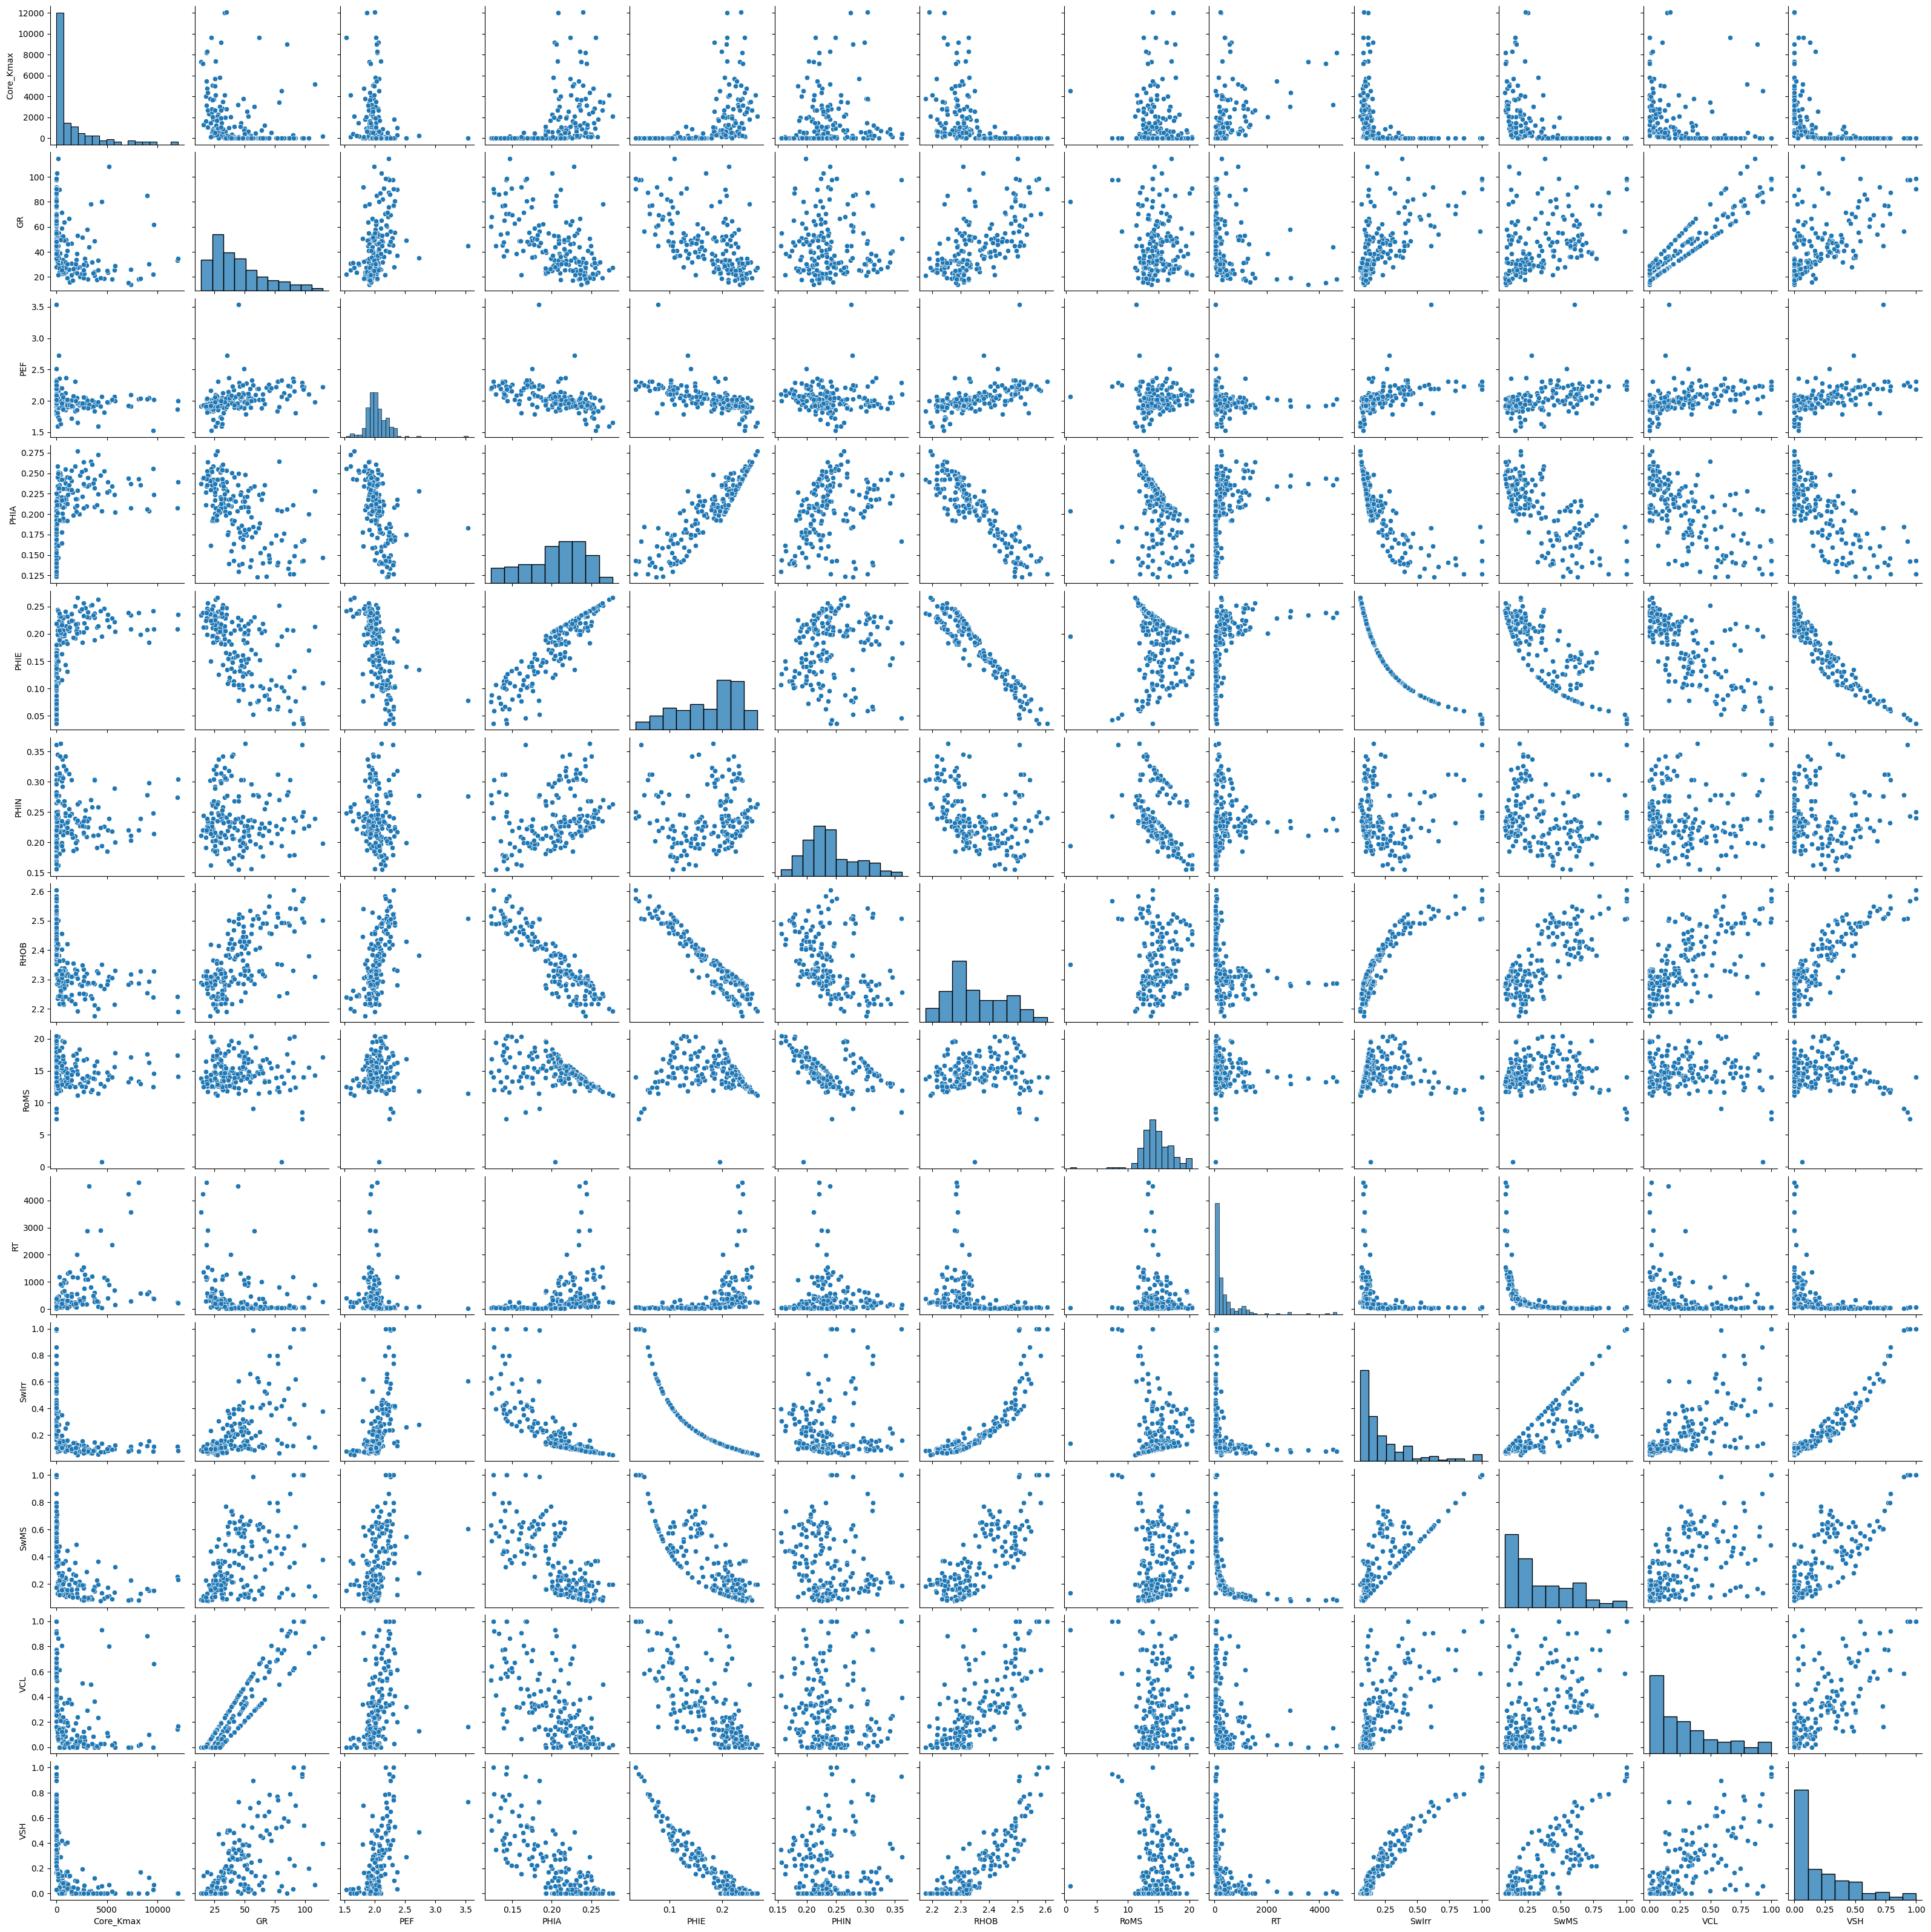

In [7]:
sns.pairplot(df)

**Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?**

In [ ]:
# length of the membership

**Create a linear model plot (using seaborn's lmplot) of  Yearly Amount Spent vs. Length of Membership. **

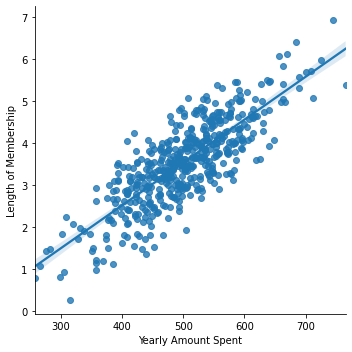

In [23]:
df.columns
sns.lmplot(x='Yearly Amount Spent',y='Length of Membership',data=df)

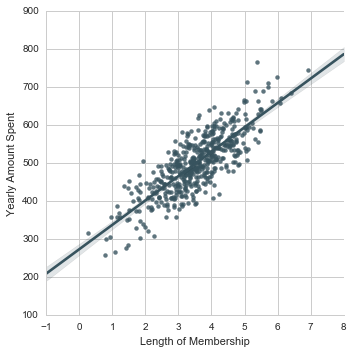

## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.
** Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column. **

In [ ]:
df.columns
X = df[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]
y= df['Yearly Amount Spent']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

** Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101**

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

## Training the Model

Now its time to train our model on our training data!

** Import LinearRegression from sklearn.linear_model **

In [ ]:
#already done above

**Create an instance of a LinearRegression() model named lm.**

In [ ]:
# already done above

** Train/fit lm on the training data.**

In [35]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Print out the coefficients of the model**

In [38]:
lm.coef_
cdf = pd.DataFrame(lm.coef_,index=X.columns,columns=['Coefficients'])
cdf

,Coefficients
Avg. Session Length,25.912259
Time on App,38.508126
Time on Website,0.288716
Length of Membership,61.161610


Coefficients: 
 [ 25.98154972  38.59015875   0.19040528  61.27909654]


## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

** Use lm.predict() to predict off the X_test set of the data.**

In [ ]:
y_p =lm.predict(X_test)

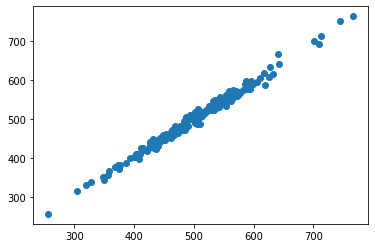

In [41]:
plt.scatter(y_test,y_p)

** Create a scatterplot of the real test values versus the predicted values. **

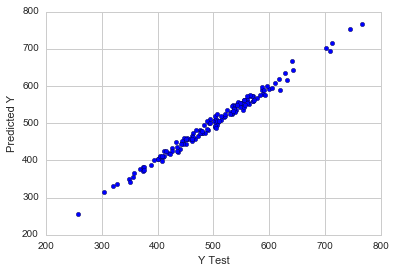

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

** Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. Refer to the lecture or to Wikipedia for the formulas**

In [ ]:
from sklearn import metrics
MAE =metrics.mean_absolute_error(y_test,y_p)
MSE = metrics.mean_squared_error(y_test,y_p)
RMSE = np.sqrt(MSE)


In [51]:
evaluation = pd.DataFrame(data =[MAE,MSE,RMSE], index='MAE MSE RMSE'.split(), columns = ['Evaluation Values'])
evaluation

,Evaluation Values
MAE,7.294547
MSE,81.907270
RMSE,9.050264


MAE: 7.22814865343
MSE: 79.813051651
RMSE: 8.93381506698


## Residuals

You should have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data. 

**Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().**

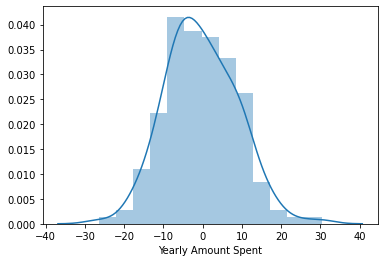

In [52]:
sns.distplot((y_test-y_p))

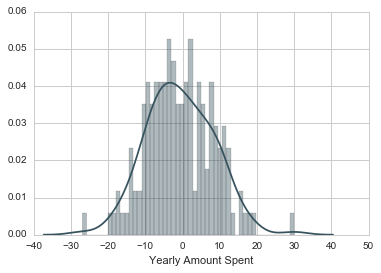

## Conclusion
We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  Let's see if we can interpret the coefficients at all to get an idea.

** Recreate the dataframe below. **

In [53]:
cdf

,Coefficients
Avg. Session Length,25.912259
Time on App,38.508126
Time on Website,0.288716
Length of Membership,61.161610


,Coeffecient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


** How can you interpret these coefficients? **

*Answer here*

**Do you think the company should focus more on their mobile app or on their website?**

APP

## Great Job!

Congrats on your contract work! The company loved the insights! Let's move on.